# Random Forest para Clasificación

## Importar Librerias

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=200: Genera 200 ejemplos o filas (puntos de datos).
- n_features=2:Cada ejemplo tiene 2 características (columnas), es decir, X.shape = (200, 2).
- n_informative=2: Las 2 características realmente contienen información útil para separar las clases.
- n_redundant=0: No se incluyen características redundantes (combinaciones lineales de las informativas).
- n_clusters_per_class=1: Cada clase se genera a partir de 1 grupo o clúster (simplifica la visualización).
- random_state=42: Semilla para que el resultado sea reproducible (siempre se generan los mismos datos).


In [2]:
# Generar 300 muestras de 2 caracteristicas, ambas información útil, no redundante, con 1 cluster por clase.
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

## Visualización de los datos

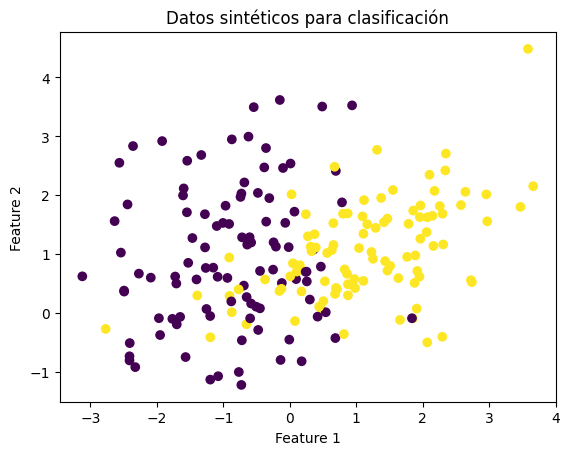

In [3]:
# Generar grafica de dispersión 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Datos sintéticos para clasificación")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer el Pipeline de estandarización y clasificación

In [11]:
pipe = Pipeline([
    ('randomForest', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42))
])

## Entrenar el modelo

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('randomForest',
                 RandomForestClassifier(max_depth=5, n_estimators=50,
                                        random_state=42))])

## Evaluar

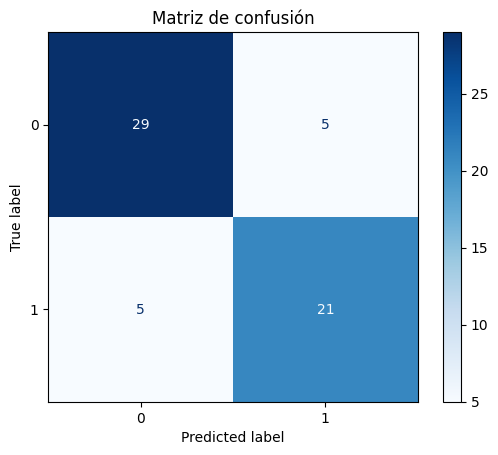

In [13]:
y_pred = pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


## Visualización de la frontera de decisión

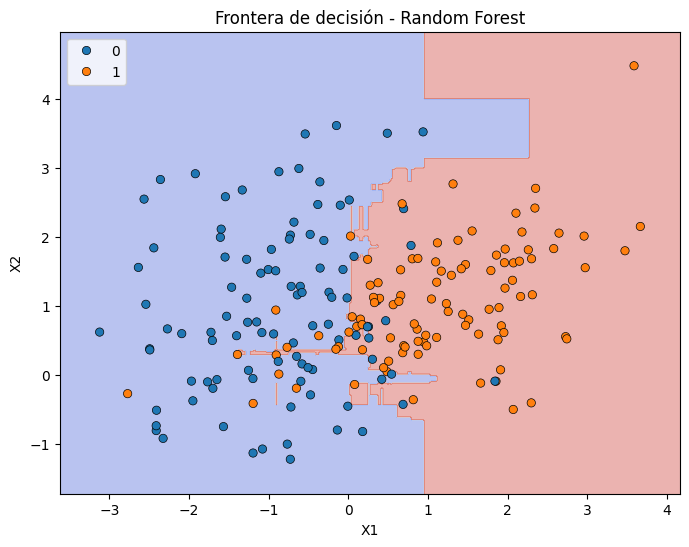

In [15]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
plt.title("Frontera de decisión - Random Forest")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## Ejercicios
- Cambiar el número de árboles (estimators) y observar su impacto.
- [dataset para predecir la especie de algunos pingüinos](https://www.openml.org/d/42585) (Aplicar este modelo al dataset penguins)


In [16]:
from sklearn.datasets import fetch_openml
import pandas as pd

dataset = fetch_openml('penguins', as_frame=False)

data = pd.DataFrame(
    dataset.data,
    columns=dataset.feature_names
)

data['species'] = dataset.target

data.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie
